## CAP5610 HW1 - Yuan Du

# Data Preprocessing and Analyze by pivoting features of Titanic dataset

In [2]:
#Data analysis and wrangling
import pandas as pd
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Load in the train and test datasets
train = pd.read_csv('C:/Work/Project/CAP5610/HW/HW1/train.csv')
test = pd.read_csv('C:/Work/Project/CAP5610/HW/HW1/test.csv')

combine = [train, test]

# Store our passenger ID for easy access
PassengerId = test['PassengerId']

In [ ]:
#Q1 show train data features
train 

In [ ]:
# Q5 count null for train
train.isnull().sum()
# Q5 count null for test
test.isnull().sum()

In [ ]:
#Q6 data types
train.info()



### Q1: In training set, which features are available?

The features in the training set (891X12) are PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked.

### Q2: In training set, which features are categorical?

Categorical: Survived, Sex, and Embarked. Ordinal: Pclass

### Q3: In training set, which features are numerical (e.g., discrete, continuous, or time series based)?

Discrete: SibSp, Parch
Continous: Age, Fare

### Q4: In training set, which features are mixed data types?

Ticket is a mix of numeric and alphanumeric data types. Cabin is alphanumeric.

### Q5: In training set, which features contain blank, null or empty values? In test set, which features contain blank, null or empty values?

Train null: Age (177), Cabin(687), Embarked(2)
Test null: Age(86), Cabin(327)

### Q6: In training set, what are the data types (e.g., integer, floats or strings ) for various features?

7 features are integer or floats. 5 features are strings (object)

### Q7: To understand the distribution of numerical feature values across the samples, please list the properties, including count, mean, std, min, 25% percentile, 50% percentile, 75% percentile, max, of numerical features?

In [4]:
#Q7 numeric variables summary
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Q8: To understand the distribution of categorical features, we define: count is the total number of categorical values per column; unique is the total number of unique categorical values per column; top is the most frequent categorical value; freq is the total number of the most frequent categorical value. Please list the properties, including count, unique, top, freq, of categorical features?

In [5]:
#Q8 categorical varaibles summary
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Douglas, Mr. Walter Donald",male,CA. 2343,G6,S
freq,1,577,7,4,644


In [ ]:
#Q9 Correlation Pclass vs Survived
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [ ]:
#Q10 Sex vs Survived
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

### Q9: Can you observe significant correlation (average survivied ratio>0.5) among the group of Pclass=1 and Survived? If Pclass has significant correlation with Survivied, we should include this feature in the predictive model. Based on your computation, will you include this feature in the predictive model?

Yes. I'll include Pclass in the model since Pclass=1 has survival rate of 0.63 (over 0.5).

### Q10: Are Women (Sex=female) were more likely to have survived?

Yes. Female has survival rate of 0.74 (over 0.5).

### Q11: Let us start by understanding correlations between a numeric feature (Age) and our predictive goal (Survived). A histogram chart is useful for analyzing continuous numerical variables like Age where banding or ranges will help identify useful patterns. The histogram can indicate distribution of samples using automatically defined bins or equally ranged bands. This helps us answer questions relating to specific bands (e.g., infants, old). Please plot the histogram plots between ages and Survived (Figure 1 is an example), and answer the following questions: 
* Do infants (Age <=4) have high survival rate? 
* Do oldest passengers (Age = 80) survive? 
* Do large number of 15-25 year olds not survive?
* Should we consider Age in our model training? (If yes, then we should complete the Age feature for null values.)
* Should we should band age groups?

Infants (age<=4) have high survival rate.
Oldest passengers (age=80) survive.
large number of 15-25 didn't survive.
Most passengers are in the 15-35 age range. Thus age is important in the model training and we should band age groups.

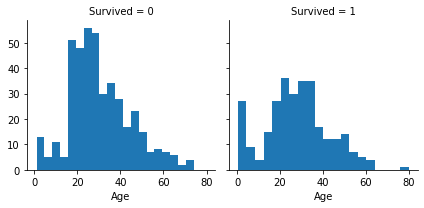

In [6]:
#Q11 visualization on age and binning
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

### Q12: We can combine three features (age, Pclass, and survivied) for identifying correlations using a single plot. This can be done with numerical and categorical features which have numeric values. Please plot the histogram plot using python, and answer the following questions:
* Does Pclass=3 have most passengers, however most did not survive?
* Do infant passengers in Pclass=2 and Pclass=3 mostly survive?
* Do most passengers in Pclass=1 survive?
* Does Pclass vary in terms of Age distribution of passengers?
* Should we consider Pclass for model training?

Pclass=3 had most passengers, however most did not survive. 
Infant passengers in Pclass=2 and Pclass=3 mostly survived.
Most passengers in Pclass=1 survived.
Pclass varies in terms of Age distribution of passengers.
We should consider Pclass for model training.

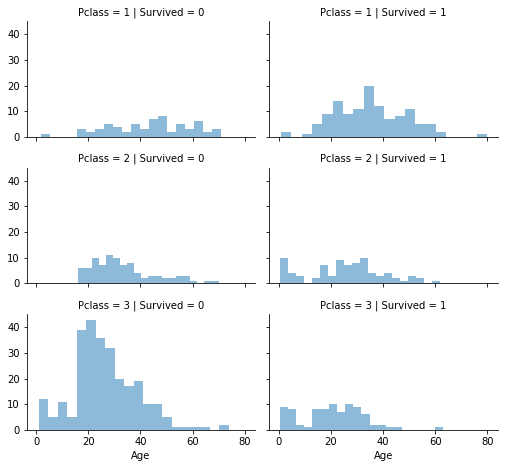

In [7]:
#Q12 Visualization on age, Pclass vs Survived
# grid = sns.FacetGrid(train, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### Q13: We want to correlate categorical features (with non-numeric values) and numeric features. We can consider correlating Embarked (Categorical non-numeric), Sex (Categorical non-numeric), Fare (Numeric continuous), with Survived (Categorical numeric). Please plot a histogram figure to illustrate the correlations of Embarked, Sex, Fare, and Survivied. 
* Do higher fare paying passengers have better survival?
* Should we consider banding fare feature?

Higher fare paying passengers had better survival. 
Port of embarkation correlates with survival rates.

C:\Users\alice\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


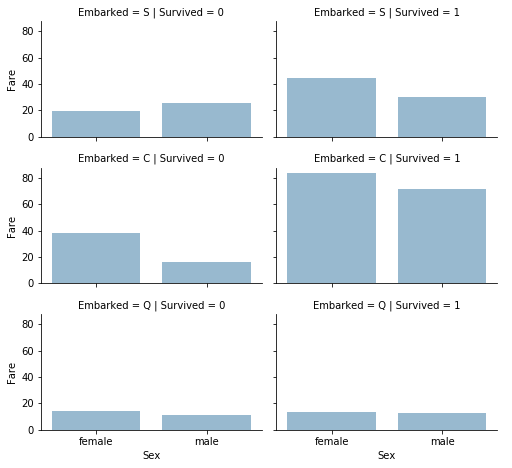

In [8]:
#Q13 visualization Emarked vs survived for Sex
# grid = sns.FacetGrid(train, col='Embarked')
grid = sns.FacetGrid(train, col='Survived', row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex','Fare',alpha=.5, ci=None)
grid.add_legend()


### Q14: What is the rate of duplicates for the Ticket feature? Is there a correlation between Ticket and survival? Should we drop the Ticket feature?

Ticket feature has high ratio (22%) of duplicate values (unique=681). There may not be a correlation between Ticket and survival. We should drop the ticket feature.

### Q15: Is the Cabin feature complete? How many null values there are in the Cabin features of the combined dataset of training and test dataset? Should we drop the Cabin feature?

Cabin is highly incomplete with 687 null values in training dataset and 327 null values in test dataset. We should drop the Cabin feature.

In [9]:
#Q14 drop ticket
#Q15 drop cabin
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
combine = [train, test]

### Q16: We can convert features which contain strings to numerical values. This is required by most model algorithms. Doing so will also help us in achieving the feature completing goal. In this question ,please convert Sex feature to a new feature called Gender where female=1 and male=0.

In [10]:
#Q16 Convert sex to numeric

for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int32(1), int64(5), object(2)
memory usage: 66.3+ KB


### Q17: We start estimating and completing features with missing or null values. We will first do this for the Age feature. We can consider three methods to complete a numerical continuous feature. A simple way is to generate random numbers between mean and standard deviation. More accurate way of guessing missing values is to use the K-Nearest Neighbor algorithm to select the top-K most similar data points, and then use the top-K most similar data points to impute the missing values of ages.

I imputed the missing age with mean.

In [11]:
#Q17 Mean with std 
# fill missing values with mean column values
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

### Q18: Completing a categorical feature: Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has some missing values. Please simply fill these with the most common occurrences.

In [12]:
#Q18 Fill embarked with mode
freq_port = train.Embarked.dropna().mode()[0]
freq_port

for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


### Q19: Completing and converting a numeric feature. Please complete the Fare feature for single missing value in test dataset using mode to get the value that occurs most frequently for this feature.

In [13]:
#Q19 complete Fare using mode
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,S


In [14]:
# update combine
combine = [train, test]

### Q20: Convert the Fare feature to ordinal values based on the FareBand defined follows:

In [15]:
#Q20 Convert the Fare feature to ordinal values

for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
    
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,3,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,1,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,3,S
4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,1,S
5,6,0,3,"Moran, Mr. James",0,29.699118,0,0,1,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.000000,0,0,3,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.000000,3,1,2,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.000000,0,2,1,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,2,C
